### UMAP/tSNE Cluster analysis and creation code

##### Chordata
- The two main Chordata clusters: Aves cluster and Non-Aves (mostly mammalia) clusters differ by **two** translocations, the locations of *ND6* and *tRNA-Glu* which stick together and move to the right of *CYTB* and Aves.
- The small Chordata scatter that is closer to the main cluster than the Aves cluster differs from the main cluster by **one** translocation, *tRNA-Leu* is to the right of *tRNA-Glu* in most chordates but to the right of *CYTB* in the Amphibia cluster.

#### Arthropoda
- The main Arthropoda cluster differs from the Insecta sub-cluster by **one** difference, *tRNA-Ile* is to the right of *tRNA-Met* and to the right of *tRNA-Glu* in the main cluster.
- The small Malaconstraca cluster (crabs) contains **one** difference from the main cluster. *tRNA-His* is to the right of *tRNA-Glu* in the small cluster but to the right of *ND5* in the main cluster.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
import os
PATH = os.getcwd()
from ast import literal_eval
import utils_clusters as uc

reload(uc)
sns.set(style='darkgrid', context='notebook', rc={'figure.figsize':(14,10)})
plt.style.use('ggplot')
pd.options.display.max_columns = 50
pd.options.display.max_rows = 1000
0



0

In [16]:

x = np.load(os.path.join(PATH, 'Distance_new.npy'))
df = pd.read_csv(os.path.join(PATH,'for_dmatrix.csv'))

df.Gene_order = df.Gene_order.apply(literal_eval)
df.Gene_order = df.Gene_order.apply(uc.list_of_genes_to_number, number2symbol = True)
df.Gene_order = df.Gene_order.astype(str)
# turn a lower triangular matrix into a mirrored full distance matrix
X = uc.convert_lower_tri(x)



In [18]:
reduced = uc.generate_model('tsne', X, os.path.join(PATH, 'TSNE', 'TSNE_models', 'all_org.npy'))

In [19]:

df = pd.concat([df, pd.DataFrame(reduced, columns = ['x', 'y'])], axis = 1)

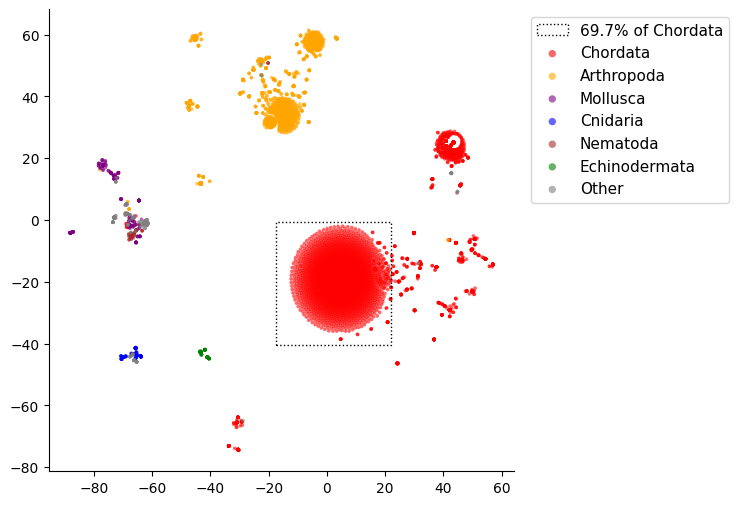

In [20]:
# Overall picture - By phylum (FIG 1B)

reload(uc)
uc.plot_from_embedding(
df,
file = os.path.join(PATH, 'figures', 'fig_1b_tsne_by_ph.svg'),
tax = 'Chordata',
taxo_level = 'phylum',
above_level = 'phylum',
add_rect = True,
rect_taxo = 'Chordata',
rect_x = [-17,22],
rect_y = [-40,0],
show_others = True,
alpha = .6,
despine = True
)

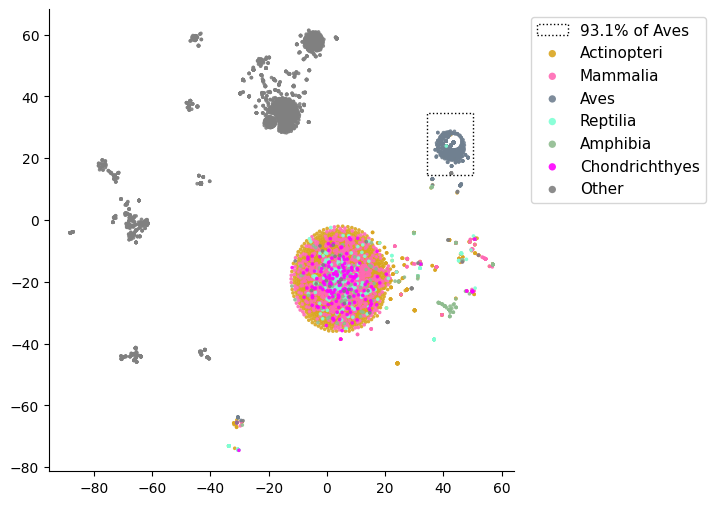

In [ ]:
# Classes within Chordata (FIG 1C)

uc.plot_from_embedding(
df,
file = os.path.join(PATH, 'figures', 'fig_1c_tsne_by_chord_classes.svg'),
tax = 'Chordata',
taxo_level = 'class',
above_level = 'phylum',
add_rect = True,
rect_taxo = 'Aves',
rect_taxo_level = 'class',
rect_x = [35, 50],
rect_y = [15, 35],
show_others = True,
despine = True
)

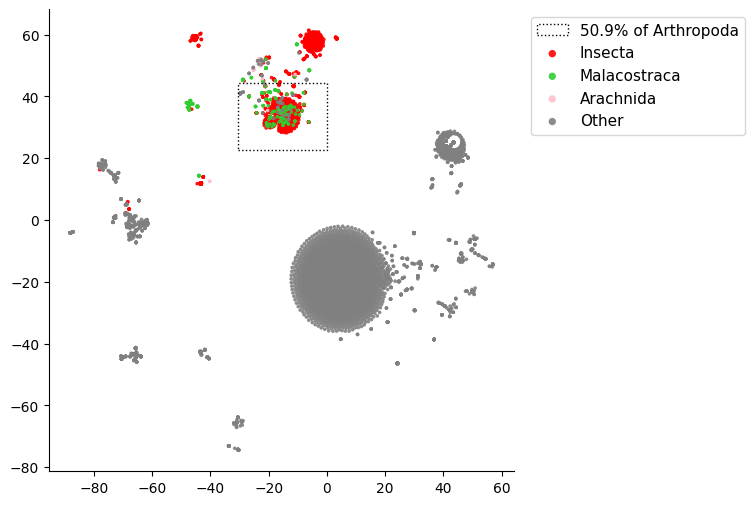

{"['-ND1', '-tRNA-Leu', '-16S ribosomal RNA', '-tRNA-Val', '-12S ribosomal RNA', 'tRNA-Ile', '-tRNA-Gln', 'tRNA-Met', 'ND2', 'tRNA-Trp', '-tRNA-Cys', '-tRNA-Tyr', 'COX1', 'tRNA-Leu*', 'COX2', 'tRNA-Lys', 'tRNA-Asp', 'ATP8', 'ATP6', 'COX3', 'tRNA-Gly', 'ND3', 'tRNA-Ala', 'tRNA-Arg', 'tRNA-Asn', 'tRNA-Ser', 'tRNA-Glu', '-tRNA-Phe', '-ND5', '-tRNA-His', '-ND4', '-ND4L', 'tRNA-Thr', '-tRNA-Pro', 'ND6', 'CYTB', 'tRNA-Ser*']": 0.7790697674418605}

In [25]:
# Classes within Arthropoda - Main cluster. (SUPP FIG 1A)

uc.plot_from_embedding(
df,
file = os.path.join(PATH, 'figures', 'supp_fig_1a_tsne_by_arth.svg'),
tax = 'Arthropoda',
taxo_level = 'class',
above_level = 'phylum',
add_rect = True,
rect_taxo = 'Arthropoda',
rect_x = [-30, 0],
rect_y = [23, 45],
show_others = True,
despine = True
)
uc.top_in_rect(df, [-30, 0], [23, 45])